<a href="https://colab.research.google.com/github/nicolas-stelatto/bootcamp_data_science_aplicada/blob/main/Modulo_1/Desafio/Notebooks/Notebook_Desafio_Modulo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Óbitos por UFs

## Motivo da escolha da base de dados

## Hipóteses e dúvidas que gostaria de responder

- Qual a tendência do número de óbitos?
- Quais os picos de número de óbitos? Isso está relacionado com algum incidente?
- Removendo os óbitos por Covi, existe uma tendência de queda?
- Quais são os cinco estados com maior número de óbitos em 2020 por 100.000 habitantes?
- Quais são os cinco estados com maior número de óbitos em 2020, desconsiderando os óbitos por covid, por 100.000 habitantes?
- O que pode estar gerando esses óbitos? gerar hipóteses
- Em 2020, desconsiderando os óbitos por covid, teríamos menos óbitos que em 2019, por conta do isolamento (menor número de acidentes de carro)?
- Quais são as regiões com maior número de mortes por habitantes? Será que existe uma região pior que a outra?



## Método para aquisição das bases de dados

## Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_dados = "https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/raw/main/Modulo_1/Desafio/Dados/obitos_por_ano_mes_por_UF.csv"

dados_obitos = pd.read_csv(url_dados, sep=";", encoding="ISO-8859-1", engine="python", skiprows=3, skipfooter=11, thousands=".", decimal=",")
dados_obitos

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,37058
1,12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18615
2,13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,64963
3,14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12466
4,15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591
5,16 Amapá,65,81,42,51,34,42,52,52,59,83,58,84,68,68,48,91,64,77,69,75,82,71,66,76,90,80,68,80,43,84,78,50,73,54,76,70,81,79,52,...,54,83,80,96,105,96,84,86,77,89,91,82,116,72,110,116,108,90,85,87,75,96,96,76,97,70,59,84,187,179,216,149,80,76,63,146,110,136,205,13005
6,17 Tocantins,141,210,253,199,173,216,229,202,189,164,195,196,165,247,168,171,206,202,218,218,210,242,200,161,229,223,256,205,211,202,233,222,187,241,226,209,216,233,206,...,218,173,228,168,167,155,195,213,170,178,168,130,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,9,14,15,4,52,33714
7,21 Maranhão,202,320,308,335,374,307,363,409,354,319,216,330,297,362,350,359,407,358,332,438,434,364,373,445,407,398,486,443,444,457,483,437,422,429,472,381,465,447,574,...,947,861,874,979,980,950,885,880,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827,940,909,970,900,1826,1932,1491,1138,1051,1110,1063,858,1057,1148,1800,113499
8,22 Piauí,224,337,337,277,368,358,368,294,358,363,355,276,332,334,312,407,350,484,337,370,266,341,323,380,419,386,390,414,379,347,291,300,304,295,379,350,358,343,432,...,530,507,553,562,578,518,584,463,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537,558,503,469,434,477,566,839,918,654,713,559,578,675,665,697,75742
9,23 Ceará,548,1021,1142,1231,1144,1191,1254,1031,1077,1170,858,1057,1052,1204,1370,1200,1410,1167,1349,1200,1264,1178,1213,1105,1159,1257,1224,1278,1269,1172,1183,1229,1157,1155,1160,1165,1147,1223,1346,...,1414,1537,1682,1709,1681,1648,1541,1661,1578,1588,1555,1484,1673,1495,1620,1754,1803,1720,1719,1734,1617,1670,1607,1692,1740,1572,1621,1603,2449,2678,2217,

In [3]:
dados_obitos.set_index("Unidade da Federação", inplace=True)

In [4]:
colunas_usaveis = dados_obitos.mean().index.to_list()

In [5]:
dados_obitos_usaveis = dados_obitos[colunas_usaveis]
dados_obitos_usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,183,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,37058
12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,141,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18615
13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,335,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,64963
14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,47,34,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12466
15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,727,698,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591


In [6]:
pd.options.display.float_format = "{:.2f}".format

## Análise preliminar dos dados

### Número de óbitos por estado no Brasil

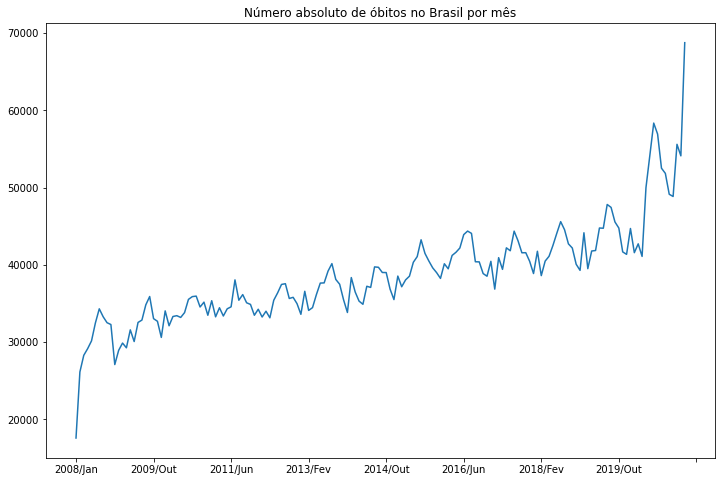

In [7]:
dados_obitos_usaveis.loc["Total"].drop("Total").plot(figsize=(12,8))
plt.title("Número absoluto de óbitos no Brasil por mês")
plt.show()

### Cinco estados com maior número de óbitos desde 2008

In [8]:
obitos_usaveis_ascending = dados_obitos_usaveis.drop("Total", axis=0).sort_values(by="Total", ascending=False).drop("Total", axis=1)

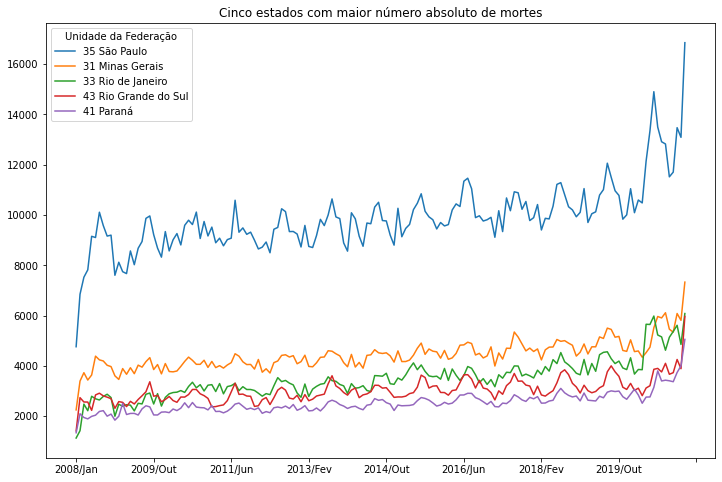

In [9]:
obitos_usaveis_ascending[:5].T.plot(figsize=(12,8))
plt.title("Cinco estados com maior número absoluto de mortes")
plt.show()

## Desafio 01. Qual a tendência do número de óbitos?


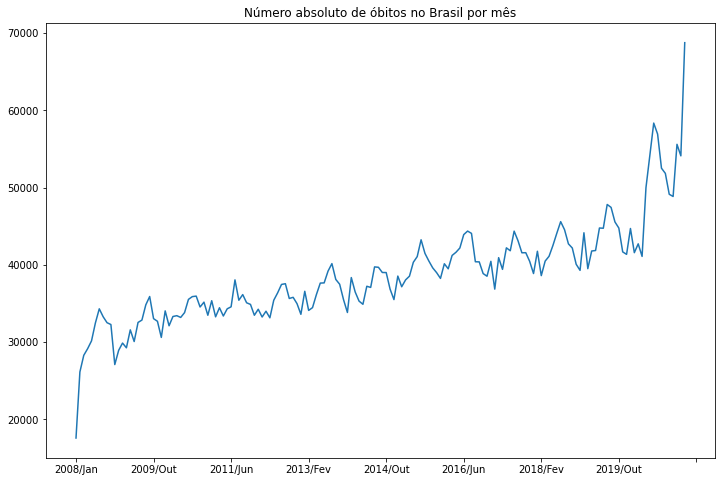

In [10]:
dados_obitos_usaveis.loc["Total"].drop("Total").plot(figsize=(12,8))
plt.title("Número absoluto de óbitos no Brasil por mês")
plt.show()

Observado o gráfico, podemos notar:
- O gráfico apresenta uma certa sazonalidade
- O grande pico localizado em 2020 tem sua origem na pandemia do coronavírus
- Mesmo desconsiderando o pico de 2020, existe uma tendência de alta. Como estamos trabalhando com valores absolutos, uma hipótese para a tendência de alta é que a população está aumentando também (vamos trabalhar isso futuramente na análise)
- O gráfico apresenta alguns valores discrepantes no início. Isso pode ser explicado por conta de uma discrepância no cadastro dos dados. Para eliminar esse problema e ajustar a base para os próximos desafios, vamos remover todos os dados de 2008, 2009 e o primeiro semestre de 2010

In [11]:
colunas_obitos_usaveis = dados_obitos_usaveis.columns.to_list()[29:]
dados_obitos_usaveis = dados_obitos_usaveis[colunas_obitos_usaveis]
dados_obitos_usaveis.head()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,201,197,271,173,159,168,172,142,165,194,183,185,168,250,269,155,150,156,135,216,213,181,222,244,228,191,183,175,171,160,203,211,243,261,271,236,201,230,236,228,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,37058
12 Acre,85,114,130,137,107,125,149,125,101,145,141,113,156,127,144,110,116,116,107,45,117,134,107,111,116,112,68,117,125,89,98,147,109,134,100,80,127,101,106,99,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18615
13 Amazonas,254,280,275,260,283,250,310,342,332,357,335,354,392,267,332,328,341,303,342,337,332,352,315,358,362,308,307,332,318,302,342,334,334,380,335,343,206,345,277,307,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,64963
14 Roraima,66,57,77,81,72,52,48,31,48,47,34,48,53,50,44,48,59,64,62,75,72,76,83,73,59,62,57,50,39,51,58,44,71,48,46,64,54,74,57,38,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12466
15 Pará,791,816,780,771,780,705,832,783,818,727,698,732,633,695,883,814,764,777,813,749,785,840,754,727,778,621,877,804,777,868,861,864,859,821,839,898,821,826,864,803,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591


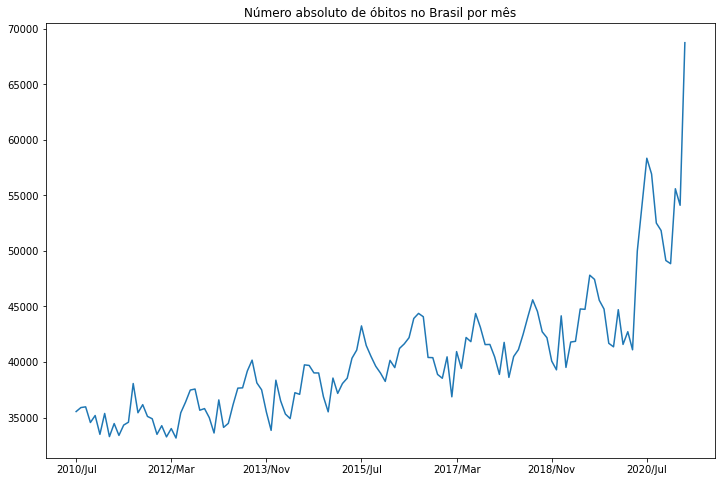

In [12]:
dados_obitos_usaveis.loc["Total"].drop("Total").plot(figsize=(12,8))
plt.title("Número absoluto de óbitos no Brasil por mês")
plt.show()

In [13]:
dados_obitos_usaveis

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,201,197,271,173,159,168,172,142,165,194,183,185,168,250,269,155,150,156,135,216,213,181,222,244,228,191,183,175,171,160,203,211,243,261,271,236,201,230,236,228,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,37058
12 Acre,85,114,130,137,107,125,149,125,101,145,141,113,156,127,144,110,116,116,107,45,117,134,107,111,116,112,68,117,125,89,98,147,109,134,100,80,127,101,106,99,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18615
13 Amazonas,254,280,275,260,283,250,310,342,332,357,335,354,392,267,332,328,341,303,342,337,332,352,315,358,362,308,307,332,318,302,342,334,334,380,335,343,206,345,277,307,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,64963
14 Roraima,66,57,77,81,72,52,48,31,48,47,34,48,53,50,44,48,59,64,62,75,72,76,83,73,59,62,57,50,39,51,58,44,71,48,46,64,54,74,57,38,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12466
15 Pará,791,816,780,771,780,705,832,783,818,727,698,732,633,695,883,814,764,777,813,749,785,840,754,727,778,621,877,804,777,868,861,864,859,821,839,898,821,826,864,803,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591
16 Amapá,78,50,73,54,76,70,81,79,52,75,86,76,107,53,80,49,63,78,115,82,66,86,85,85,87,74,75,103,83,78,85,70,63,94,83,92,108,90,74,70,...,54,83,80,96,105,96,84,86,77,89,91,82,116,72,110,116,108,90,85,87,75,96,96,76,97,70,59,84,187,179,216,149,80,76,63,146,110,136,205,13005
17 Tocantins,233,222,187,241,226,209,216,233,206,241,228,221,243,221,194,195,193,160,194,245,252,218,230,222,223,215,230,226,222,170,206,213,243,251,241,250,190,262,221,239,...,218,173,228,168,167,155,195,213,170,178,168,130,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,9,14,15,4,52,33714
21 Maranhão,483,437,422,429,472,381,465,447,574,515,518,430,436,539,563,485,571,537,570,610,518,680,655,607,672,588,566,530,542,534,659,584,557,635,823,692,731,703,759,708,...,947,861,874,979,980,950,885,880,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827,940,909,970,900,1826,1932,1491,1138,1051,1110,1063,858,1057,1148,1800,113499
22 Piauí,291,300,304,295,379,350,358,343,432,371,431,326,417,389,352,418,454,451,448,398,423,418,495,416,481,470,477,459,491,347,437,505,375,568,553,567,499,621,448,404,...,530,507,553,562,578,518,584,463,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537,558,503,469,434,477,566,839,918,654,713,559,578,675,665,697,75742


Agora podemos perceber mais claramente a tendência de crescimento do número de óbitos (precisamos verificar se existe uma tendência de crescimento considerando os óbitos relativos à população do Brasil)

## Desafio 02. Quais os picos de números de óbitos? Isso está relacionado à algum incidente?

Os dois picos de óbitos estão relacionados à pandemia do coronavírus. Tanto no início do segundo semestre de 2020 e no início de 2021 tivemos um pico de mortes por coronavírus ou SRAG (Síndrome respiratória aguda grave)

Há um pico bem claro no início do segundo semestre de 2020, onde tivemos um pico de mortes na pandemia do coronavírus e tivemos outro pico claro no início de 2021

Uma hipótese para a sazonalidade do número de óbitos no segundo semestre de cada ano é relacionado à variação dos tempos de inverno. Existem alguns trabalhos científicos que relacionam variações atmosféricas do tempo de inverno com óbitos por gripe ou doenças respiratórias para idosos

Seria necessário analisar outras informações para ter uma conclusão precisa sobre a sazonalidade do número de óbitos

## Desafio 03. Quais são os cinco estados com maior número de óbitos por habitante nos picos detectados no total de óbitos

### Baixando dados de população/habitantes por UF

A população é um dado demográfico medido pelo IBGE em um censo que é realizado a cada 10 anos. Para nosso trabalho, nós vamos usar a informação de projeções da população realizada pelo IGBE e revisado em 2018.

Os dados foram retirados [desse link](https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?=&t=downloads)

In [14]:
url_habitantes = "https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/raw/main/Modulo_1/Desafio/Dados/Populacoes_Projetadas_Mensais_dia_01_ate_2030.csv"

habitantes_uf = pd.read_csv(url_habitantes, sep=";", encoding="ISO-8859-1", engine="python", skiprows=1, skipfooter=2, decimal=",", thousands=".")
habitantes_uf

,DATA,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,RondÃ´nia,Acre,Amazonas,Roraima,ParÃ¡,AmapÃ¡,Tocantins,MaranhÃ£o,PiauÃ­,CearÃ¡,Rio Grande do Norte,ParaÃ­ba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,EspÃ­rito Santo,Rio de Janeiro,SÃ£o Paulo,ParanÃ¡,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,GoiÃ¡s,Distrito Federal
0,"julho, 2010",194875052,16247841,54229734,82138970,27911930,14346577,1598381,765430,3551217,459844,7765472,693857,1413640,6715260,3193930,8625391,3240375,3840945,9001011,3196933,2108757,14307132,19957386,3595291,16298103,42288190,10650244,6351544,10910142,2493878,3104317,6109715,2638667
1,"agosto, 2010",195017573,16267657,54255905,82198254,27930974,14364783,1600017,766537,3556859,460248,7773575,695303,1415119,6718546,3194627,8629903,3242977,3842254,9006205,3198340,2110555,14312498,19968902,3599212,16306954,42323187,10657439,6358951,10914584,2496536,3107705,6118387,2642154
2,"setembro, 2010",195160170,16287491,54282102,82257547,27950035,14382995,1601654,767643,3562499,460676,7781672,696749,1416598,6721836,3195325,8634424,3245578,3843572,9011400,3199746,2112353,14317867,19980421,3603135,16315815,42358175,10664640,6366366,10919029,2499195,3111098,6127059,2645643
3,"outubro, 2010",195302839,16307345,54308325,82316846,27969111,14401212,1603293,768749,3568137,461128,7789765,698194,1418079,6725128,3196025,8638953,3248178,3844900,9016599,3201150,2114152,14323240,19991945,3607060,16324688,42393154,10671848,6373788,10923476,2501855,3114496,6135729,2649132
4,"novembro, 2010",195445578,16327217,54334573,82376151,27988203,14419434,1604933,769854,3573774,461604,7797852,699639,1419560,6728424,3196727,8643490,3250775,3846237,9021800,3202552,2115951,14328616,20003471,3610987,16333571,42428122,10679062,6381216,10927925,2504515,3117899,6144397,2652623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,"agosto, 2021",213411444,18914284,57687606,89672793,30415643,16721117,1816538,907972,4275008,642606,8784594,878858,1608708,7156110,3288856,9244661,3563319,4060643,9679800,3366300,2340125,14987791,21419713,4111513,17467528,46674040,11602509,7344046,11469089,2841128,3569700,7215725,3094565
134,"setembro, 2021",213539236,18933498,57711462,89723498,30432917,16737861,1818085,908994,4280157,644296,8791682,880174,1610110,7159266,3289473,9249035,3565498,4062358,9684532,3367408,2341731,14992160,21429374,4115170,17475450,46703504,11609137,7351140,11472640,2843581,3573098,7223389,3097793
135,"outubro, 2021",213666727,18952684,57735255,89774065,30450147,16754577,1819630,910015,4285300,645981,8798759,881489,1611510,7162417,3290087,9253397,3567673,4064070,9689255,3368512,2343335,14996510,21439004,4118820,17483348,46732894,11615749,7358222,11476176,2846031,3576491,7231040,3101015
136,"novembro, 2021",213793916,18971840,57758987,89824492,30467333,16771264,1821172,911035,4290437,647660,8805825,882803,1612908,7165562,3290698,9257749,3569842,4065778,9693967,3369614,2344935,15000841,21448601,4122464,17491219,46762208,11622347,7365292,11479695,2848476,3579880,7238677,3104232


### Ajustando e limpando a planilha para realizar operações

Precisamos agora ajustar cada uma das colunas e linhas e transpor a planilha

Agora vamos limpar os dados removendo as informações das colunas Brasil, Norte, Nordeste, Sudeste, Sul e Centro-Oeste e os dados de 2021 de março para frente

Removendo Dados do Brasil, Norte, Nordeste, Sudeste, Sul e Centro-Oeste

In [15]:
habitantes_uf.drop(["Brasil", "Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"], axis=1, inplace=True)

Transpondo a planilha

In [16]:
habitantes_uf = habitantes_uf.T

Removendo dados de 2021 a partir de mar de 2021

In [17]:
habitantes_columns = habitantes_uf.columns.to_list()[:-9]
habitantes_uf = habitantes_uf[habitantes_columns]

Criando uma lista com o nome das colunas da planilha dados_obitos_usaveis e mudando o nome das colunas da planilha habitantes_uf_2

In [18]:
habitantes_columns_new = dados_obitos_usaveis.columns.to_list()[:-1]
habitantes_uf.columns = habitantes_columns_new

Removendo a linha de DATA

In [19]:
habitantes_uf.drop("DATA", axis=0, inplace=True)

Adicionando coluna de Unidade da Federação

In [20]:
habitantes_uf_nome_uf = dados_obitos_usaveis.index.to_list()[:-1]
habitantes_uf["Unidade da Federação"] = habitantes_uf_nome_uf

Transformando coluna de unidade de federação para o index

In [21]:
habitantes_uf.set_index("Unidade da Federação", inplace=True)

Adicionando uma row com o total de população do Brasil

In [22]:
habitantes_uf.loc["Total"] = habitantes_uf.sum()
habitantes_uf

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1598381,1600017,1601654,1603293,1604933,1606575,1608218,1609862,1611507,1613154,1614802,1616451,1618102,1619753,1621406,1623060,1624715,1626370,1628027,1629685,1631343,1633003,1634663,1636324,1637986,1639649,1641312,1642976,1644641,1646306,1647972,1649639,1651306,1652973,1654641,1656309,1657978,1659647,1661316,1662986,...,1746110,1747751,1749391,1751029,1752665,1754300,1755934,1757566,1759196,1760825,1762452,1764077,1765700,1767322,1768942,1770560,1772176,1773791,1775403,1777013,1778622,1780228,1781833,1783435,1785035,1786633,1788228,1789822,1791413,1793002,1794589,1796173,1797755,1799334,1800911,1802485,1804057,1805627,1807193,1808758
12 Acre,765430,766537,767643,768749,769854,770960,772065,773169,774273,775377,776481,777584,778687,779789,780891,781993,783094,784195,785296,786396,787496,788595,789694,790793,791891,792988,794085,795182,796279,797374,798470,799565,800659,801753,802847,803940,805033,806125,807217,808308,...,862127,863187,864246,865304,866361,867417,868473,869528,870582,871635,872688,873740,874791,875841,876890,877939,878986,880033,881079,882125,883169,884213,885255,886297,887338,888379,889418,890456,891494,892531,893566,894601,895635,896668,897701,898732,899762,900792,901820,902848
13 Amazonas,3551217,3556859,3562499,3568137,3573774,3579409,3585042,3590674,3596303,3601931,3607556,3613180,3618801,3624421,3630038,3635654,3641267,3646878,3652487,3658093,3663698,3669300,3674900,3680497,3686093,3691685,3697276,3702863,3708449,3714032,3719612,3725190,3730765,3736337,3741907,3747474,3753038,3758600,3764159,3769715,...,4043237,4048608,4053975,4059338,4064696,4070050,4075399,4080743,4086083,4091419,4096749,4102075,4107397,4112713,4118025,4123332,4128634,4133931,4139224,4144511,4149794,4155071,4160344,4165611,4170874,4176131,4181383,4186630,4191872,4197108,4202340,4207566,4212786,4218002,4223212,4228416,4233615,4238809,4243997,4249179
14 Roraima,459844,460248,460676,461128,461604,462104,462628,463175,463746,464339,464955,465594,466255,466938,467643,468370,469118,469887,470677,471487,472319,473170,474042,474933,475844,476775,477724,478692,479680,480685,481709,482751,483810,484888,485982,487094,488222,489367,490529,491707,...,566288,567994,569704,571419,573137,574860,576586,578315,580047,581783,583521,585261,587004,588749,590496,592244,593993,595744,597495,599247,601000,602753,604506,606258,608010,609762,611512,613261,615009,616756,618500,620243,621983,623720,625455,627187,628916,630642,632364,634082
15 Pará,7765472,7773575,7781672,7789765,7797852,7805935,7814013,7822086,7830154,7838217,7846275,7854327,7862375,7870417,7878454,7886485,7894512,7902532,7910548,7918557,7926562,7934560,7942553,7950540,7958522,7966498,7974468,7982432,7990390,7998343,8006289,8014229,8022164,8030092,8038014,8045929,8053839,8061742,8069639,8077530,...,8462974,8470482,8477982,8485472,8492955,8500428,8507892,8515348,8522795,8530233,8537661,8545081,8552492,8559894,8567286,8574670,8582044,8589409,8596764,8604110,8611447,8618774,8626092,8633400,8640699,8647988,8655268,8662537,8669797,8677047,8684288,8691518,8698739,8705949,8713150,8720340,8727520,8734691,8741851,8749000
16 Amapá,693857,695303,696749,698194,699639,701083,702527,7039

### Criando planilha de óbitos para cada 100.000 habitantes
Para criar essa planilha, utilizamos a fórmula (óbitos/(habitantes/100.000))

In [23]:
dados_obitos_por_100k = dados_obitos_usaveis.drop("Total", axis=1) / (habitantes_uf / 100000)
dados_obitos_por_100k.head()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,12.58,12.31,16.92,10.79,9.91,10.46,10.70,8.82,10.24,12.03,11.33,11.44,10.38,15.43,16.59,9.55,9.23,9.59,8.29,13.25,13.06,11.08,13.58,14.91,13.92,11.65,11.15,10.65,10.40,9.72,12.32,12.79,14.72,15.79,16.38,14.25,12.12,13.86,14.21,13.71,...,13.46,17.11,17.21,16.50,16.32,16.13,16.00,20.77,15.35,14.31,15.21,15.48,16.03,16.86,15.26,14.97,18.56,18.15,14.36,18.51,15.74,17.53,18.18,17.49,12.72,16.79,13.76,14.36,15.02,16.45,19.89,24.83,26.48,22.68,16.27,14.76,19.96,24.09,18.43,30.91
12 Acre,11.10,14.87,16.93,17.82,13.90,16.21,19.30,16.17,13.04,18.70,18.16,14.53,20.03,16.29,18.44,14.07,14.81,14.79,13.63,5.72,14.86,16.99,13.55,14.04,14.65,14.12,8.56,14.71,15.70,11.16,12.27,18.38,13.61,16.71,12.46,9.95,15.78,12.53,13.13,12.25,...,12.30,14.83,9.84,10.52,11.20,10.95,17.16,14.72,13.44,16.06,16.50,21.17,12.69,15.41,12.20,15.72,13.65,16.59,16.57,12.47,16.30,15.61,14.35,11.85,14.31,17.67,17.09,20.21,15.48,17.70,21.38,21.46,18.20,15.17,19.27,13.24,16.34,15.87,20.85,22.71
13 Amazonas,7.15,7.87,7.72,7.29,7.92,6.98,8.65,9.52,9.23,9.91,9.29,9.80,10.83,7.37,9.15,9.02,9.36,8.31,9.36,9.21,9.06,9.59,8.57,9.73,9.82,8.34,8.30,8.97,8.58,8.13,9.19,8.97,8.95,10.17,8.95,9.15,5.49,9.18,7.36,8.14,...,9.97,10.79,10.04,12.12,11.56,13.10,13.15,11.91,11.89,11.29,12.52,11.38,12.08,13.86,12.00,15.21,12.89,13.79,11.04,13.27,12.51,14.34,13.05,13.25,11.75,12.45,14.23,12.11,15.01,35.36,34.86,21.77,15.60,15.96,14.42,16.91,14.34,31.38,38.08,42.27
14 Roraima,14.35,12.38,16.71,17.57,15.60,11.25,10.38,6.69,10.35,10.12,7.31,10.31,11.37,10.71,9.41,10.25,12.58,13.62,13.17,15.91,15.24,16.06,17.51,15.37,12.40,13.00,11.93,10.45,8.13,10.61,12.04,9.11,14.68,9.90,9.47,13.14,11.06,15.12,11.62,7.73,...,15.36,19.54,18.78,13.65,16.23,17.92,22.89,21.27,17.93,21.66,19.02,18.80,17.38,19.36,20.66,8.78,19.36,18.30,20.75,28.54,19.80,23.06,18.20,21.61,20.07,17.22,17.33,17.45,15.93,28.70,53.03,28.54,13.67,17.16,18.23,21.52,20.19,30.13,50.92,45.26
15 Pará,10.19,10.50,10.02,9.90,10.00,9.03,10.65,10.01,10.45,9.28,8.90,9.32,8.05,8.83,11.21,10.32,9.68,9.83,10.28,9.46,9.90,10.59,9.49,9.14,9.78,7.80,11.00,10.07,9.72,10.85,10.75,10.78,10.71,10.22,10.44,11.16,10.19,10.25,10.71,9.94,...,10.15,10.98,11.32,11.91,11.73,12.74,11.87,10.79,12.01,11.54,11.43,10.40,11.24,11.36,10.95,11.36,11.54,11.83,12.60,10.08,10.23,11.68,10.72,10.66,11.58,10.77,11.25,10.91,10.22,15.60,25.54,17.53,20.26,13.74,11.69,12.33,12.24,13.31,14.07,14.60


### Analisando mortes por 100.000 habitantes do brasil inteiro

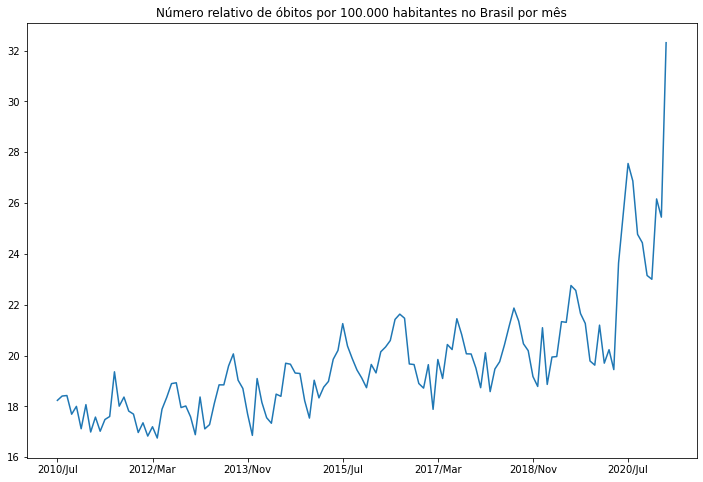

In [24]:
dados_obitos_por_100k.loc["Total"].plot(figsize=(12,8))
plt.title("Número relativo de óbitos por 100.000 habitantes no Brasil por mês")
plt.show()

Analisando esses dados podemos ver que, mesmo removendo a variável de população, ainda se mantém a sazonalidade e tendência de crescimento observado no Desafio 01

### Criando um gráfico com os cinco estados com maior número de óbitos por habitante

Nessa análise, gostaria de verificar quais foram os estados que tiveram maior número de óbitos por 100.000 habitantes nos dois picos da pandemia do coronavírus:
- Jul/2020
- Mar/2021

Julho de 2020

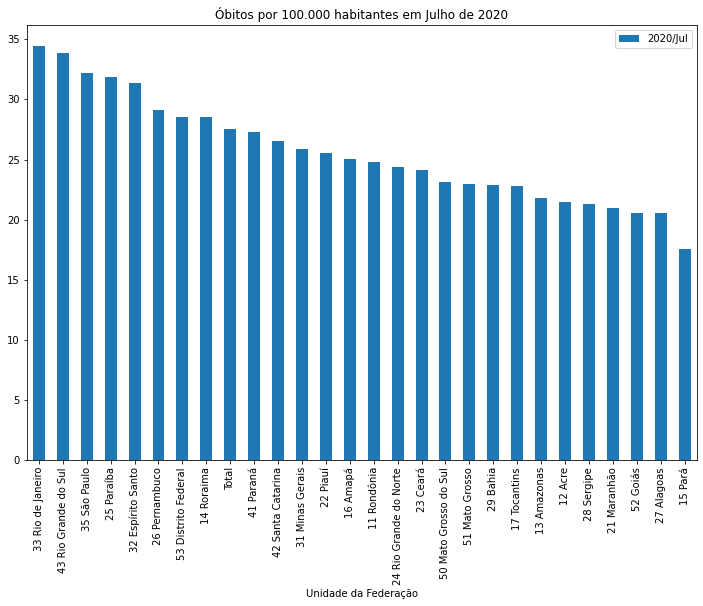

In [25]:
dados_obitos_por_100k.sort_values(by="2020/Jul", axis=0, ascending=False).plot.bar(y=["2020/Jul"], figsize=(12,8))
plt.title("Óbitos por 100.000 habitantes em Julho de 2020")
plt.show()

Março de 2021

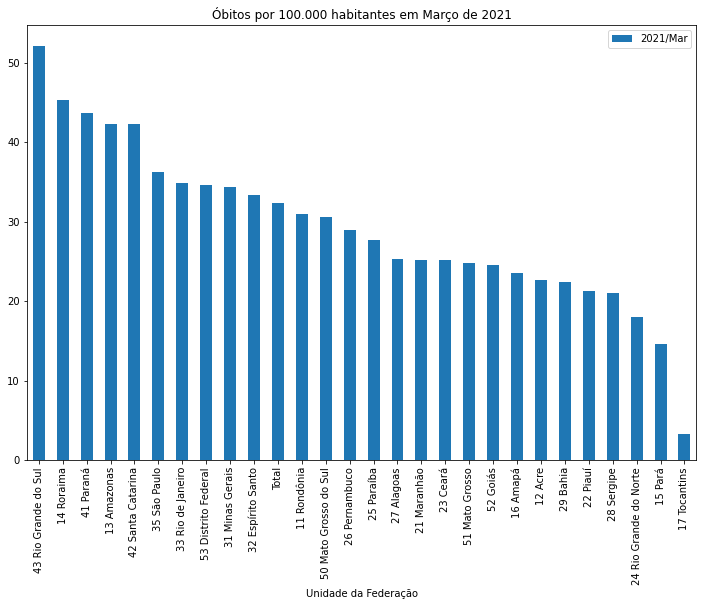

In [26]:
dados_obitos_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False).plot.bar(y="2021/Mar", figsize=(12,8))
plt.title("Óbitos por 100.000 habitantes em Março de 2021")
plt.show()

O pico de março de 2021 foi muito pior. Mas quão pior foi? Será que todos os estados que foram muito impactados no pico de 2020 sofreram igual em 2021?Comparando os dois períodos

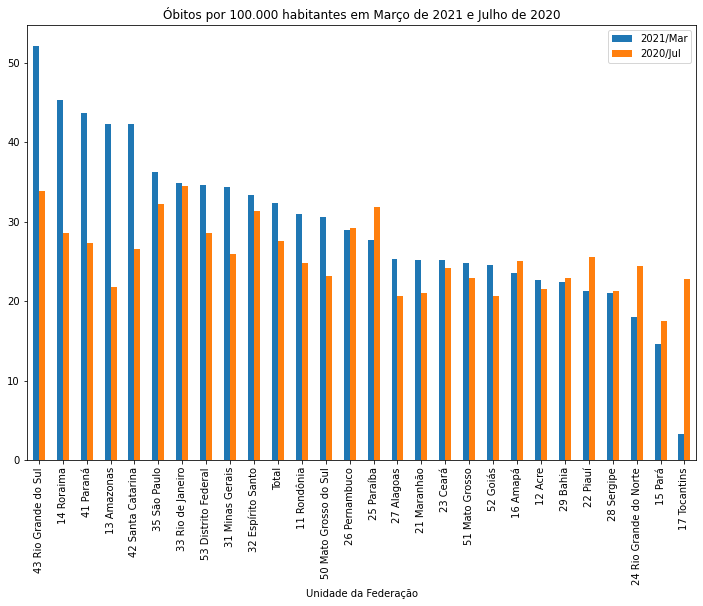

In [27]:
dados_obitos_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False).plot.bar(y=["2021/Mar", "2020/Jul"], figsize=(12,8))
plt.title("Óbitos por 100.000 habitantes em Março de 2021 e Julho de 2020")
plt.show()

## Desafio 04. Como se comportam os óbitos por região? Por valores absolutos e por valores relativos à população

Como fazer essa análise:
- Mudar a planilha dados_obitos_usaveis criando uma coluna de regiao
- Depois que criou a regiao precisa criar uma linha para cada regiao que soma os valores de cada estado da regiao
- Criar um novo dataframe sem o valor dos estados e com o valor das regiões e do brasil
--
- Mudar a planilha habitantes_uf criando uma coluna de regiao
- Depois que criou a regiao precisa criar uma linha para cada regiao que soma os valores de cada estado da regiao
- Criar um novo dataframe sem o valor dos estados e com o valor das regiões e do brasil
--
- Alterar depois todas os gráficos dos estados removendo o valor do brasil desse gráfico
- No gráfico das regiões ter o valor do brasil

FAZER TODOS ESSES PASSOS SEM ALTERAR NADA ACIMA DESSA LINHA, SÓ MUDAR PARA BAIXO PARA NÃO FUDER O CÓDIGO

In [28]:
#index_list = dados_obitos_por_100k.index.to_list()

#regiao = []
#for estado in index_list:
#  if estado[0] == "1":
#    regiao.append("Norte")
#  elif estado[0] == "2":
#    regiao.append("Nordeste")
#  elif estado[0] == "3":
#    regiao.append("Sudeste")
#  elif estado[0] == "4":
#    regiao.append("Sul")
#  elif estado[0] == "5":
#    regiao.append("Centro-Oeste")
#
# regiao.append("Brasil")

In [29]:
#dados_obitos_por_100k["Regiao"] = regiao

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,12.58,12.31,16.92,10.79,9.91,10.46,10.70,8.82,10.24,12.03,11.33,11.44,10.38,15.43,16.59,9.55,9.23,9.59,8.29,13.25,13.06,11.08,13.58,14.91,13.92,11.65,11.15,10.65,10.40,9.72,12.32,12.79,14.72,15.79,16.38,14.25,12.12,13.86,14.21,13.71,...,17.11,17.21,16.50,16.32,16.13,16.00,20.77,15.35,14.31,15.21,15.48,16.03,16.86,15.26,14.97,18.56,18.15,14.36,18.51,15.74,17.53,18.18,17.49,12.72,16.79,13.76,14.36,15.02,16.45,19.89,24.83,26.48,22.68,16.27,14.76,19.96,24.09,18.43,30.91,Norte
12 Acre,11.10,14.87,16.93,17.82,13.90,16.21,19.30,16.17,13.04,18.70,18.16,14.53,20.03,16.29,18.44,14.07,14.81,14.79,13.63,5.72,14.86,16.99,13.55,14.04,14.65,14.12,8.56,14.71,15.70,11.16,12.27,18.38,13.61,16.71,12.46,9.95,15.78,12.53,13.13,12.25,...,14.83,9.84,10.52,11.20,10.95,17.16,14.72,13.44,16.06,16.50,21.17,12.69,15.41,12.20,15.72,13.65,16.59,16.57,12.47,16.30,15.61,14.35,11.85,14.31,17.67,17.09,20.21,15.48,17.70,21.38,21.46,18.20,15.17,19.27,13.24,16.34,15.87,20.85,22.71,Norte
13 Amazonas,7.15,7.87,7.72,7.29,7.92,6.98,8.65,9.52,9.23,9.91,9.29,9.80,10.83,7.37,9.15,9.02,9.36,8.31,9.36,9.21,9.06,9.59,8.57,9.73,9.82,8.34,8.30,8.97,8.58,8.13,9.19,8.97,8.95,10.17,8.95,9.15,5.49,9.18,7.36,8.14,...,10.79,10.04,12.12,11.56,13.10,13.15,11.91,11.89,11.29,12.52,11.38,12.08,13.86,12.00,15.21,12.89,13.79,11.04,13.27,12.51,14.34,13.05,13.25,11.75,12.45,14.23,12.11,15.01,35.36,34.86,21.77,15.60,15.96,14.42,16.91,14.34,31.38,38.08,42.27,Norte
14 Roraima,14.35,12.38,16.71,17.57,15.60,11.25,10.38,6.69,10.35,10.12,7.31,10.31,11.37,10.71,9.41,10.25,12.58,13.62,13.17,15.91,15.24,16.06,17.51,15.37,12.40,13.00,11.93,10.45,8.13,10.61,12.04,9.11,14.68,9.90,9.47,13.14,11.06,15.12,11.62,7.73,...,19.54,18.78,13.65,16.23,17.92,22.89,21.27,17.93,21.66,19.02,18.80,17.38,19.36,20.66,8.78,19.36,18.30,20.75,28.54,19.80,23.06,18.20,21.61,20.07,17.22,17.33,17.45,15.93,28.70,53.03,28.54,13.67,17.16,18.23,21.52,20.19,30.13,50.92,45.26,Norte
15 Pará,10.19,10.50,10.02,9.90,10.00,9.03,10.65,10.01,10.45,9.28,8.90,9.32,8.05,8.83,11.21,10.32,9.68,9.83,10.28,9.46,9.90,10.59,9.49,9.14,9.78,7.80,11.00,10.07,9.72,10.85,10.75,10.78,10.71,10.22,10.44,11.16,10.19,10.25,10.71,9.94,...,10.98,11.32,11.91,11.73,12.74,11.87,10.79,12.01,11.54,11.43,10.40,11.24,11.36,10.95,11.36,11.54,11.83,12.60,10.08,10.23,11.68,10.72,10.66,11.58,10.77,11.25,10.91,10.22,15.60,25.54,17.53,20.26,13.74,11.69,12.33,12.24,13.31,14.07,14.60,Norte
16 Amapá,11.24,7.19,10.48,7.73,10.86,9.98,11.53,11.22,7.37,10.61,12.14,10.71,15.05,7.44,11.20,6.85,8.79,10.86,15.98,11.37,9.13,11.88,11.72,11.69,11.94,10.14,10.26,14.06,11.31,10.60,11.53,9.48,8.52,12.68,11.18,12.36,14.49,12.05,9.89,9.34,...,6.58,10.09,9.71,11.63,12.70,11.60,10.13,10.35,9.26,10.68,10.90,9.81,13.85,8.58,13.09,13.79,12.81,10.66,10.05,10.27,8.84,11.30,11.28,8.92,11.36,8.19,6.89,9.79,21.77,20.81,25.07,17.27,9.26,8.78,7.27,16.81,12.65,15.62,23.50,Norte
17 Tocantins,16.48,15.69,13.20,16.99,15.92,14.71,15.18,16.36,14.45,16.89,15.96,15.46,16.98,15.42,13.52,13.58,13.43,11.12,13.47,16.99,17.46,15.09,15.90,15.33,15.39,14.82,15.84,15.55,15.26,11.67,14.13,14.59,16.63,17.16,16.46,17.06,12.95,17.84,15.03,16.24,...,14.09,11.17,14.71,10.83,10.75,9.97,12.53,13.68,10.91,1

In [32]:
#dados_obitos_por_100k[dados_obitos_por_100k["Regiao"]=="Norte"]

#dados_obitos_por_100k_regiao = dados_obitos_por_100k.loc["Norte"] = dados_obitos_por_100k.loc["Norte"].drop("Norte", axis=1).sum()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiao,Norte
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,12.58,12.31,16.92,10.79,9.91,10.46,10.70,8.82,10.24,12.03,11.33,11.44,10.38,15.43,16.59,9.55,9.23,9.59,8.29,13.25,13.06,11.08,13.58,14.91,13.92,11.65,11.15,10.65,10.40,9.72,12.32,12.79,14.72,15.79,16.38,14.25,12.12,13.86,14.21,13.71,...,17.21,16.50,16.32,16.13,16.00,20.77,15.35,14.31,15.21,15.48,16.03,16.86,15.26,14.97,18.56,18.15,14.36,18.51,15.74,17.53,18.18,17.49,12.72,16.79,13.76,14.36,15.02,16.45,19.89,24.83,26.48,22.68,16.27,14.76,19.96,24.09,18.43,30.91,Norte,NaN
12 Acre,11.10,14.87,16.93,17.82,13.90,16.21,19.30,16.17,13.04,18.70,18.16,14.53,20.03,16.29,18.44,14.07,14.81,14.79,13.63,5.72,14.86,16.99,13.55,14.04,14.65,14.12,8.56,14.71,15.70,11.16,12.27,18.38,13.61,16.71,12.46,9.95,15.78,12.53,13.13,12.25,...,9.84,10.52,11.20,10.95,17.16,14.72,13.44,16.06,16.50,21.17,12.69,15.41,12.20,15.72,13.65,16.59,16.57,12.47,16.30,15.61,14.35,11.85,14.31,17.67,17.09,20.21,15.48,17.70,21.38,21.46,18.20,15.17,19.27,13.24,16.34,15.87,20.85,22.71,Norte,NaN
13 Amazonas,7.15,7.87,7.72,7.29,7.92,6.98,8.65,9.52,9.23,9.91,9.29,9.80,10.83,7.37,9.15,9.02,9.36,8.31,9.36,9.21,9.06,9.59,8.57,9.73,9.82,8.34,8.30,8.97,8.58,8.13,9.19,8.97,8.95,10.17,8.95,9.15,5.49,9.18,7.36,8.14,...,10.04,12.12,11.56,13.10,13.15,11.91,11.89,11.29,12.52,11.38,12.08,13.86,12.00,15.21,12.89,13.79,11.04,13.27,12.51,14.34,13.05,13.25,11.75,12.45,14.23,12.11,15.01,35.36,34.86,21.77,15.60,15.96,14.42,16.91,14.34,31.38,38.08,42.27,Norte,NaN
14 Roraima,14.35,12.38,16.71,17.57,15.60,11.25,10.38,6.69,10.35,10.12,7.31,10.31,11.37,10.71,9.41,10.25,12.58,13.62,13.17,15.91,15.24,16.06,17.51,15.37,12.40,13.00,11.93,10.45,8.13,10.61,12.04,9.11,14.68,9.90,9.47,13.14,11.06,15.12,11.62,7.73,...,18.78,13.65,16.23,17.92,22.89,21.27,17.93,21.66,19.02,18.80,17.38,19.36,20.66,8.78,19.36,18.30,20.75,28.54,19.80,23.06,18.20,21.61,20.07,17.22,17.33,17.45,15.93,28.70,53.03,28.54,13.67,17.16,18.23,21.52,20.19,30.13,50.92,45.26,Norte,NaN
15 Pará,10.19,10.50,10.02,9.90,10.00,9.03,10.65,10.01,10.45,9.28,8.90,9.32,8.05,8.83,11.21,10.32,9.68,9.83,10.28,9.46,9.90,10.59,9.49,9.14,9.78,7.80,11.00,10.07,9.72,10.85,10.75,10.78,10.71,10.22,10.44,11.16,10.19,10.25,10.71,9.94,...,11.32,11.91,11.73,12.74,11.87,10.79,12.01,11.54,11.43,10.40,11.24,11.36,10.95,11.36,11.54,11.83,12.60,10.08,10.23,11.68,10.72,10.66,11.58,10.77,11.25,10.91,10.22,15.60,25.54,17.53,20.26,13.74,11.69,12.33,12.24,13.31,14.07,14.60,Norte,NaN
16 Amapá,11.24,7.19,10.48,7.73,10.86,9.98,11.53,11.22,7.37,10.61,12.14,10.71,15.05,7.44,11.20,6.85,8.79,10.86,15.98,11.37,9.13,11.88,11.72,11.69,11.94,10.14,10.26,14.06,11.31,10.60,11.53,9.48,8.52,12.68,11.18,12.36,14.49,12.05,9.89,9.34,...,10.09,9.71,11.63,12.70,11.60,10.13,10.35,9.26,10.68,10.90,9.81,13.85,8.58,13.09,13.79,12.81,10.66,10.05,10.27,8.84,11.30,11.28,8.92,11.36,8.19,6.89,9.79,21.77,20.81,25.07,17.27,9.26,8.78,7.27,16.81,12.65,15.62,23.50,Norte,NaN
17 Tocantins,16.48,15.69,13.20,16.99,15.92,14.71,15.18,16.36,14.45,16.89,15.96,15.46,16.98,15.42,13.52,13.58,13.43,11.12,13.47,16.99,17.46,15.09,15.90,15.33,15.39,14.82,15.84,15.55,15.26,11.67,14.13,14.59,16.63,17.16,16.46,17.06,12.95,17.84,15.03,16.24,...,11.17,14.71,10.83,10.75,9.97,12.53,13.68,10.91,11.41,10.76,8.32,15.7